In [2]:
#%matplotlib notebook
from os import listdir
from os.path import isfile, join
import licel as licel
import generic as generic
import numpy as np
import matplotlib.pyplot as plt

In [11]:
root_dir = '/home/luka/lidar/2020/29042020/TC_data'
data_dir = root_dir
#dark_dir = root_dir+'/dark'
filelist = [ join(data_dir,f) for f in listdir(data_dir) if isfile(join(data_dir,f)) ]
measurement = generic.LicelLidarMeasurement(filelist)
ch_list = measurement.channels.keys()
print(ch_list)

['00355.o_an', '00387.o_an', '00355.o_ph', '00387.o_ph']


In [12]:
ch_name = ch_list[1]
######################## TRIGGER DELAY ########################
td = 7
if td < 0:
    ll = 0
    ul = -1
elif td > 0:
    ll = 0
    ul = -td
######################## TRIGGER DELAY ########################
z = measurement.channels[ch_name].z
z = np.roll(z,-1)

for key in sorted(measurement.channels[ch_name].site):
    sector = measurement.channels[ch_name].site[key].lower()
    data = measurement.channels[ch_name].data[key]
    print(sector)
    if sector[0:2] == 'n':
        N = data
    elif sector.lower()[0] == 'e':
        E = data
    elif sector[0] == 'w':
        W = data
    elif sector[0] == 's':
        S = data
    elif sector[0:2] == 'n2':
        N2 = data
    elif sector[0].lower() == 'd':
        D = data

def get_RCS(signal, z, trigger_delay=0, bg1=2670, bg2=4000):
    signal = np.roll(signal, -trigger_delay)
    background = np.mean(signal[bg1:bg2])
    RCS = (signal - background) * (z **2)
    if trigger_delay < 0:
        RCS[:-trigger_delay] = 0.0
    elif trigger_delay > 0:   
        RCS[-trigger_delay:] = np.nan
    return RCS

Drc = get_RCS(D,z,trigger_delay=td)
Nrc = get_RCS(N,z,trigger_delay=td)
Erc = get_RCS(E,z,trigger_delay=td)
Wrc = get_RCS(W,z,trigger_delay=td)
Src = get_RCS(S,z,trigger_delay=td)
N2rc = get_RCS(N2,z,trigger_delay=td)

#Nrc = Nrc - Drc
#Erc = Erc - Drc
#Wrc = Wrc - Drc
#Src = Src - Drc
#N2rc = N2rc - Drc

M = ( N + E + S + W ) / 4.0
Mrc = ( Nrc + Erc + Src + Wrc ) / 4.0

n
w
e
s
n2
dark


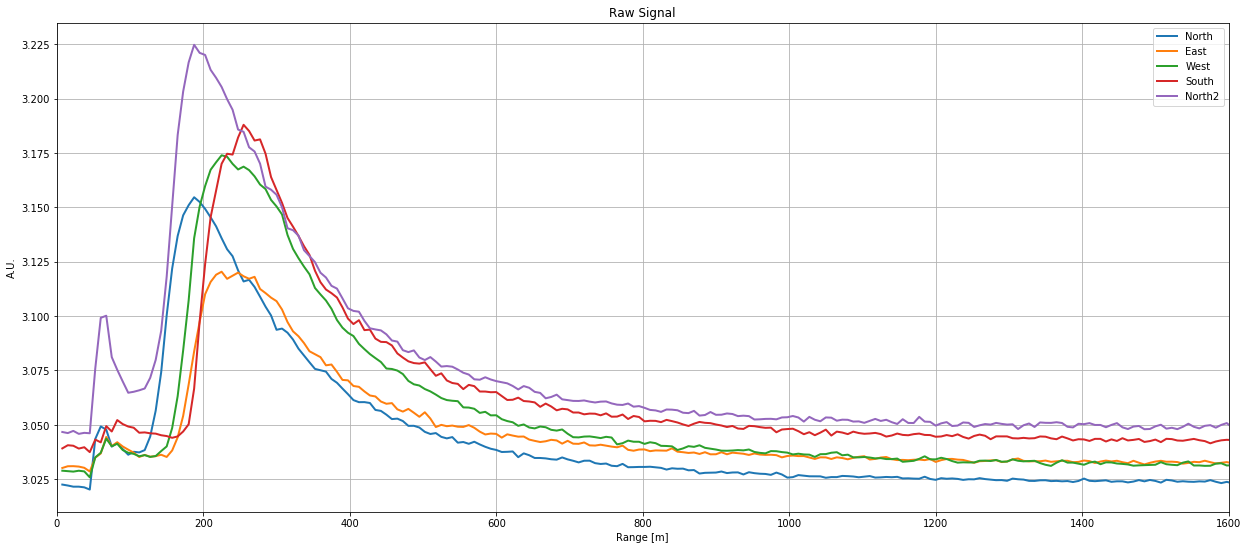

In [13]:
plt.figure(figsize=(21,9))
plt.plot(z[ll:ul],N[ll:ul], linewidth=2, label = 'North')
plt.plot(z[ll:ul],E[ll:ul], linewidth=2, label = 'East')
plt.plot(z[ll:ul],W[ll:ul], linewidth=2, label = 'West')
plt.plot(z[ll:ul],S[ll:ul], linewidth=2, label = 'South')
#plt.plot(z,M, linewidth=2, label = 'Mean')
plt.plot(z[ll:ul],N2[ll:ul], linewidth=2, label = 'North2')
#plt.plot(z,D, linewidth=2, label = 'Dark')
plt.grid()
plt.legend(loc='upper right')
plt.title('Raw Signal')
plt.xlabel('Range [m]')
#plt.ylabel('Analog Signal [mV]')
plt.ylabel('A.U.')
#plt.ylabel('Photon Counting Signal [MHz]')
plt.xlim(0,1600)
#plt.ylim(4.9,4.95)
plt.show()

200 300 1500.0 2250.0


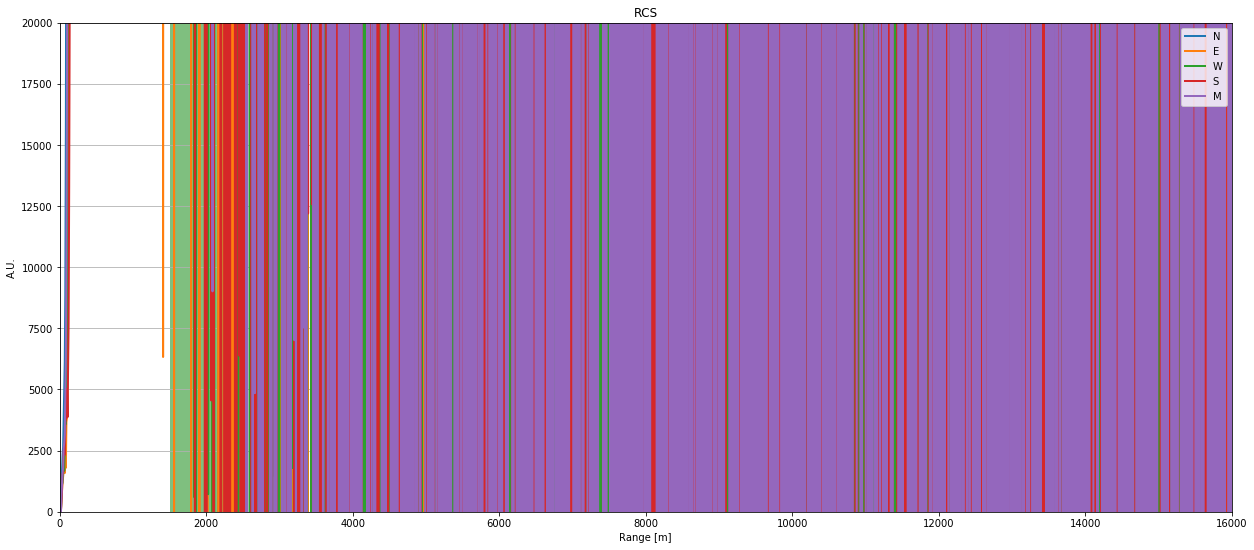

In [77]:
#r1 = 450
#r2 = 550
r1 = 200
r2 = 300
plt.figure(figsize=(21,9))
plt.plot(z[ll:ul],Nrc[ll:ul], linewidth=2, label = 'N')
plt.plot(z[ll:ul],Erc[ll:ul], linewidth=2, label = 'E')
plt.plot(z[ll:ul],Wrc[ll:ul], linewidth=2, label = 'W')
plt.plot(z[ll:ul],Src[ll:ul], linewidth=2, label = 'S')
plt.plot(z[ll:ul],Mrc[ll:ul], linewidth=2, label = 'M')

print r1, r2, r1*7.5, r2*7.5
plt.axvspan(r1*7.5, r2*7.5, facecolor='g', alpha=0.5)
plt.grid()
plt.legend(loc='upper right')
plt.title('RCS')
plt.xlabel('Range [m]')
plt.ylabel('A.U.')
plt.xlim(0,16000)
#plt.xlim(0,16000)
#plt.ylim(0,8E5)
plt.ylim(0,2E4)
plt.show()

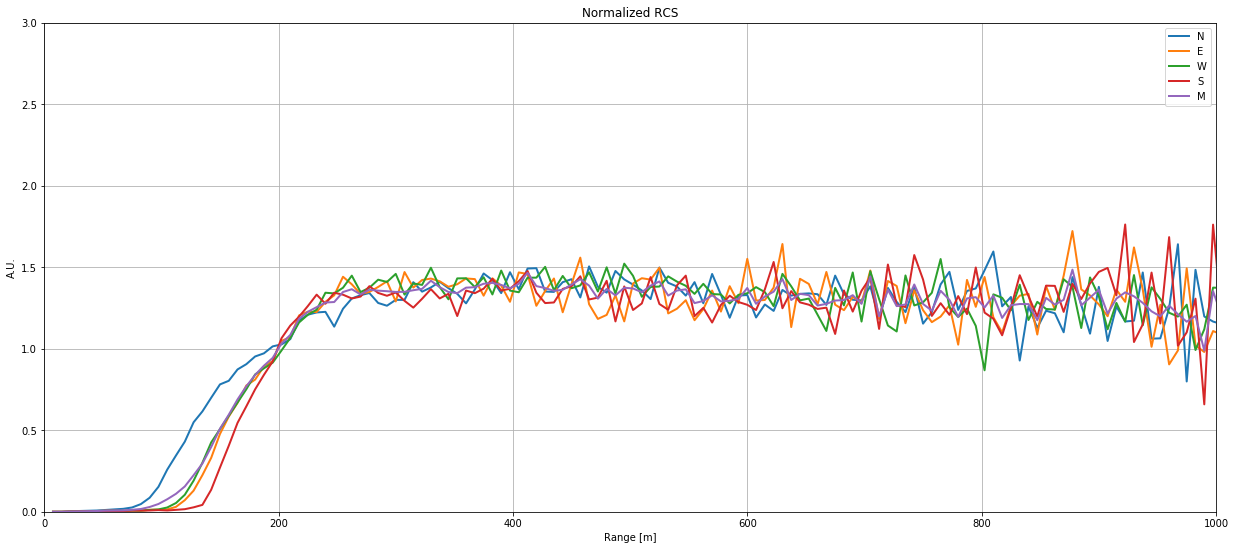

In [78]:
En = Erc / np.mean(Erc[r1:r2])
Sn = Src / np.mean(Src[r1:r2])
Wn = Wrc / np.mean(Wrc[r1:r2])
Nn = Nrc / np.mean(Nrc[r1:r2])
Mn = ( Nn + En + Sn + Wn ) / 4.0

plt.figure(figsize=(21,9))
plt.plot(z[ll:ul],Nn[ll:ul], linewidth=2, label = 'N')
plt.plot(z[ll:ul],En[ll:ul], linewidth=2, label = 'E')
plt.plot(z[ll:ul],Wn[ll:ul], linewidth=2, label = 'W')
plt.plot(z[ll:ul],Sn[ll:ul], linewidth=2, label = 'S')
plt.plot(z[ll:ul],Mn[ll:ul], linewidth=2, label = 'M')
plt.grid()
plt.legend(loc='upper right')
plt.title('Normalized RCS')
plt.xlabel('Range [m]')
plt.ylabel('A.U.')
plt.xlim(0,1000)
plt.ylim(0,3)
#plt.ylim(0,0.0005)
plt.show()

/home/luka/anaconda3/envs/qa/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.
/home/luka/anaconda3/envs/qa/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.
/home/luka/anaconda3/envs/qa/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/home/luka/anaconda3/envs/qa/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  
/home/luka/anaconda3/envs/qa/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/luka/anaconda3/envs/qa/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  Thi

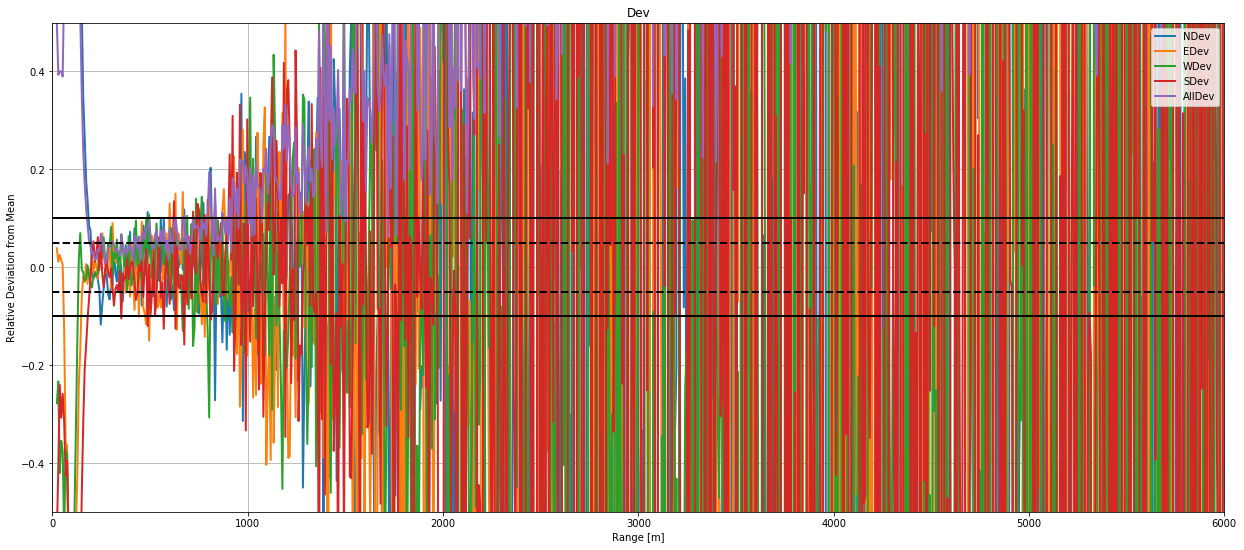

In [79]:
NDev = (Nn - Mn) / Mn
EDev = (En - Mn) / Mn
SDev = (Sn - Mn) / Mn
WDev = (Wn - Mn) / Mn
AllDev = np.sqrt((NDev**2 + EDev**2 + SDev**2 + WDev**2)/4.0)

plt.figure(figsize=(21,9))
plt.ylim(-0.5,0.5)
plt.plot(z[ll:ul],NDev[ll:ul], linewidth=2, label = 'NDev')
plt.plot(z[ll:ul],EDev[ll:ul], linewidth=2, label = 'EDev')
plt.plot(z[ll:ul],WDev[ll:ul], linewidth=2, label = 'WDev')
plt.plot(z[ll:ul],SDev[ll:ul], linewidth=2, label = 'SDev')
plt.plot(z[ll:ul],AllDev[ll:ul], linewidth=2, label = 'AllDev')
plt.axhline(y=0.1, linewidth=2, color='black')
plt.axhline(y=-0.1, linewidth=2, color='black')
plt.axhline(y=0.05, linestyle='--', linewidth=2, color='black')
plt.axhline(y=-0.05, linestyle='--', linewidth=2, color='black')
plt.grid()
plt.legend(loc='upper right')
plt.title('Dev')
plt.xlabel('Range [m]')
plt.ylabel('Relative Deviation from Mean')
plt.xlim(0,6000)
#plt.ylim(0,0.1E7)
plt.show()

In [62]:
lidar_site = 'station ID = bgd (Belgrade)\n'
lidar_name = 'system = BARLI\n'
channel = 'signal = 0387, analog, dark subtracted\n'
date = 'date of measurement = 29.04.2020, 0300UTC\n'
columns = 'range, N, E, W, S, N2, D'
l = 4001
out_z = z[:l]
out_N = Nrc[:l]
out_E = Erc[:l]
out_W = Wrc[:l]
out_S = Src[:l]
out_N2 = N2rc[:l]
out_D = Drc[:l]
header = lidar_site + lidar_name + channel + date + columns
np.savetxt('tele387a.txt', np.column_stack((out_z,out_N,out_E,out_W,out_S,out_N2,out_D)), fmt='%.15e', header = header, comments='', delimiter=',')

In [80]:
lidar_site = 'station ID = bgd (Belgrade)\n'
lidar_name = 'system = BARLI\n'
channel = 'signal = 0387, photon counting\n'
date = 'date of measurement = 29.04.2020, 0300UTC\n'
columns = 'range, N, E, W, S, N2'
l = 4001
out_z = z[:l]
out_N = Nrc[:l]
out_E = Erc[:l]
out_W = Wrc[:l]
out_S = Src[:l]
out_N2 = N2rc[:l]
header = lidar_site + lidar_name + channel + date + columns
np.savetxt('tele387pc.txt', np.column_stack((out_z,out_N,out_E,out_W,out_S,out_N2)), fmt='%.15e', header = header, comments='', delimiter=',')

In [147]:
Nrc

array([               nan,                nan,                nan, ...,
                      nan, -12858885.04793233,        -0.        ])